In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('converted_data.csv', index_col=[0])

In [5]:
df.head()

,url,articles,tokenized,lemmatized,back_to_strings,year
0,/2022/04/01/books/review/letters-to-the-editor...,to the editor regarding daphne merkin’s review...,"['to', 'the', 'editor', 'regarding', 'daphne',...","['to', 'the', 'editor', 'regarding', 'daphne',...",to the editor regarding daphne merkin’s revie...,2022-04-01
1,/2022/03/22/technology/bitcoin-miners-environm...,along a dirt covered road deep in texas farm c...,"['along', 'a', 'dirt', 'covered', 'road', 'dee...","['along', 'a', 'dirt', 'covered', 'road', 'dee...",along a dirt covered road deep in texas farm ...,2022-03-22
2,/2022/03/19/opinion/abortion-laws-bans-missour...,with roe v wade on thin ice state legislatur...,"['with', 'roe', 'v', '', 'wade', 'on', 'thin',...","['with', 'roe', 'v', '', 'wade', 'on', 'thin',...",with roe v wade on thin ice state legislatu...,2022-03-19
3,/2022/03/25/sports/baseball/mlb-drug-testing.html,phoenix — when the 99 day work stoppage in maj...,"['phoenix', '—', 'when', 'the', '99', 'day', '...","['phoenix', '—', 'when', 'the', '99', 'day', '...",phoenix — when the 99 day work stoppage in ma...,2022-03-25
4,/2022/03/15/business/russia-debt-bonds-default...,russia is teetering on the edge of a possible...,"['', 'russia', 'is', 'teetering', 'on', 'the',...","['', 'russia', 'is', 'teetering', 'on', 'the',...",russia is teetering on the edge of a possibl...,2022-03-15


In [9]:
df.year = pd.to_datetime(df.year)

In [10]:
df.year

0      2022-04-01
1      2022-03-22
2      2022-03-19
3      2022-03-25
4      2022-03-15
          ...    
1023   2022-03-11
1024   2022-03-13
1025   2022-03-23
1026   2022-04-01
1027   2022-03-23
Name: year, Length: 1005, dtype: datetime64[ns]

In [11]:
df['month'] = df.year.dt.month

In [12]:
df['month'].value_counts()

3    801
4    200
2      3
1      1
Name: month, dtype: int64

In [16]:
word_cloud = WordCloud(collocations = False,background_color = 'white').generate(df.back_to_strings[0])

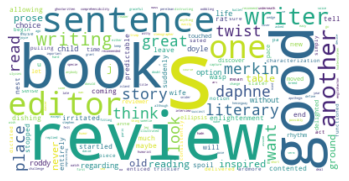

In [18]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
data_march = df[df['month'] == 3]
data_april = df[df['month'] == 4]

In [20]:
march_string = ''
for i in df.back_to_strings:
    march_string = march_string + ' ' + i

In [80]:
word_cloud_2 = WordCloud(collocations = False,background_color = 'white',stopwords=list_of).generate(march_string)

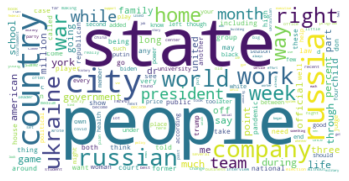

In [81]:
plt.imshow(word_cloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
april_string = ''
for i in df.back_to_strings:
    april_string = april_string + ' ' + i
word_cloud_3 = WordCloud(collocations = False,background_color = 'white',stop_words=['wa','s']).generate(april_string)

In [78]:
word_cloud_3 = WordCloud(collocations = False,background_color = 'white',stopwords=list_of).generate(april_string)

In [77]:
list_of = ['wa','s','the','in','a','to','and','of','it','for','who','and','with','by','he','said','that','not','than','can','her','about','their','from','ha','i','an','at','have','they','she','this','on','but','are','hi','all','which','just','over','this','mr','when','his','is','be','had','were','you','there','would','t','will','how','since','like','we','new','one','some','after','also','more','been','one','or','out','no','where','m','could','what','other','now','him','if','up','re','because','into','them','our','two','into','so','before','even','first','get','many','time','those','most','u','make','my','only','do','day','against','made','year','last','did','back','down','then','still']

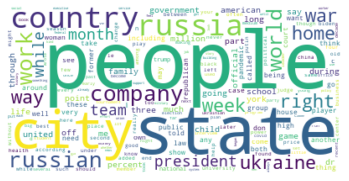

In [79]:
plt.imshow(word_cloud_3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words={'english'},max_df=.8,min_df=2)
X = vectorizer.fit_transform(df.back_to_strings)
terms2 = vectorizer.get_feature_names()


In [30]:
X_transpose = X.transpose()

In [29]:
new_wordcloud = WordCloud().generate_from_frequencies(X)

AttributeError: items not found

In [33]:
pd.DataFrame(X_transpose)

,0
0,"(0, 41)\t2\n (0, 50)\t1\n (0, 62)\t1\n (0..."
1,"(0, 1)\t2\n (0, 2)\t1\n (0, 5)\t3\n (0, 6..."
2,"(0, 1)\t1\n (0, 628)\t1\n (0, 780)\t1"
3,"(0, 429)\t2\n (0, 444)\t1"
4,"(0, 444)\t1\n (0, 445)\t1"
...,...
21579,"(0, 829)\t1\n (0, 931)\t1"
21580,"(0, 21)\t12\n (0, 156)\t1\n (0, 283)\t1"
21581,"(0, 422)\t3\n (0, 525)\t1\n (0, 689)\t1"
21582,"(0, 308)\t1\n (0, 318)\t1\n (0, 386)\t1\n ..."


In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
list_of = set(stopwords.words('english'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\lmoran/nltk_data'
    - 'C:\\Users\\lmoran\\Anaconda3\\nltk_data'
    - 'C:\\Users\\lmoran\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\lmoran\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\lmoran\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
